[-60.43344879 -61.24903488 -61.39134598 -60.83179474 -57.9058342
 -55.80563354 -58.27059937 -55.91806793 -54.88217926 -56.35074615
 -58.49616241 -60.30291748 -53.75883865 -59.77124786 -46.69457626
 -34.93466949 -34.70789337 -42.50855637 -40.97175598 -52.32396698
 -39.11674118 -38.33114624 -39.6034584  -45.75398636 -59.66985321
 -58.5828476  -51.92035675 -42.58600616 -42.54427338 -44.0510788
 -45.19862366 -47.6060524  -48.27624512 -49.21777725 -49.66153336
 -41.71092987 -48.66430283 -49.05661392 -42.08895874 -41.78929138
 -49.80846405 -52.35664749 -41.17321014 -45.13803101 -56.98811722
 -60.38577271 -61.97235107 -55.07702637 -38.43509293 -36.22161102
 -37.64246368 -42.52379608 -38.50402451 -46.98471832 -40.47562408
 -47.90192795 -53.03810883 -41.88551331 -42.21847534 -56.69710159
 -59.2976799  -60.35771561 -60.52858734 -60.74377441 -59.0212822
 -55.57157516 -47.3420105  -56.43725586 -59.77230072 -60.90810013
 -61.71561432 -60.82316208 -53.60367584 -32.64476395 -37.80666351
 -43.68192291

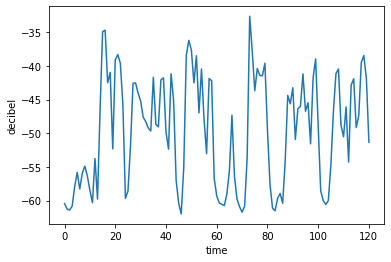

In [51]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 음성 파일 가져오기
audio_file = 'test_voice.wav'
y, sr = librosa.load(audio_file)

# 프레임 길이, hop 길이를 설정
frame_length = 0.025  # 25ms
hop_length = 0.010    # 10ms

# STFT
n_fft = int(sr * frame_length)
hop_length = int(sr * hop_length)
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Mel Filterbank
n_mels = 128
mel_filterbank = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
mel_spec = mel_filterbank.dot(np.abs(stft)**2)

# 로그 스케일 변환
log_mel_spec = librosa.power_to_db(mel_spec)

mean_decibel = np.mean(log_mel_spec, axis=0)

# 음성 시간을 초 단위로 나누어 평균 구하기
size = int(np.ceil(mean_decibel.size / 10))
n = 10

mean_arr = np.zeros((size,))
for i in range(size):
    mean_arr[i] = np.mean(mean_decibel[i*n:(i+1)*n])

print(mean_arr)

# 피치 기울기 구하기
pitch_slope = mean_arr[-1] - mean_arr[0]
print('pitch_slope: ', pitch_slope)

plt.plot(mean_arr)
plt.xlabel("time")
plt.ylabel("decibel")
plt.show()